In [1]:
!pip install tensorflow

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 0.2564 - val_loss: 0.1822
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1774 - val_loss: 0.1620
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1723 - val_loss: 0.1597
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1697 - val_loss: 0.1581
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1672 - val_loss: 0.1583
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1668 - val_loss: 0.1547
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1658 - val_loss: 0.1571
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1654 - val_loss: 0.1564
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1655 - val_loss: 0.1562
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Custom Combined Loss: 0.1548
Mean Squared Error: 0.0786

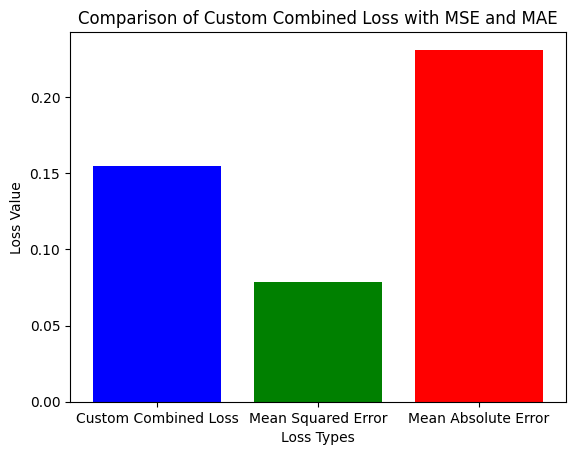

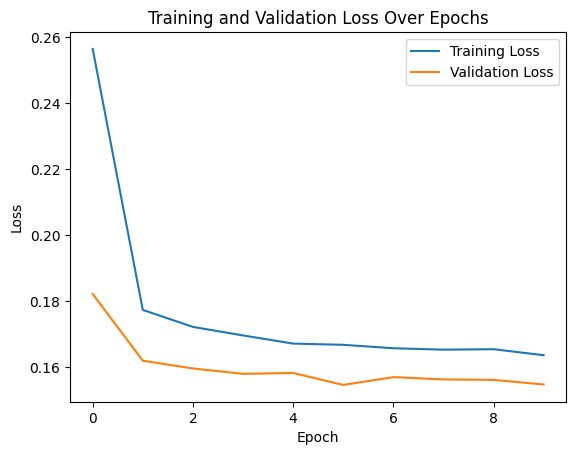

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
import matplotlib.pyplot as plt

# تعریف تابع ضرر ترکیبی
def combined_loss(alpha=0.5):
    def loss(y_true, y_pred):
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        mae = tf.reduce_mean(tf.abs(y_true - y_pred))
        return alpha * mse + (1 - alpha) * mae
    return loss

# تعریف مدل ساده برای تست
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])

# کامپایل مدل با استفاده از تابع ضرر سفارشی
model.compile(optimizer='adam', loss=combined_loss(alpha=0.5))

# داده‌های مثال
x_train = np.random.random((1000, 10))
y_train = np.random.random((1000, 1))
x_val = np.random.random((200, 10))
y_val = np.random.random((200, 1))

# آموزش مدل
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# ارزیابی مدل
loss_values = model.evaluate(x_val, y_val, verbose=0)

# محاسبه MSE و MAE
mse_loss_fn = MeanSquaredError()
mae_loss_fn = MeanAbsoluteError()

mse_values = mse_loss_fn(y_val, model.predict(x_val)).numpy()
mae_values = mae_loss_fn(y_val, model.predict(x_val)).numpy()

# چاپ نتایج
print(f"Custom Combined Loss: {loss_values:.4f}")
print(f"Mean Squared Error: {mse_values:.4f}")
print(f"Mean Absolute Error: {mae_values:.4f}")

# نمایش بصری مقایسه
loss_types = ['Custom Combined Loss', 'Mean Squared Error', 'Mean Absolute Error']
loss_scores = [loss_values, mse_values, mae_values]

plt.bar(loss_types, loss_scores, color=['blue', 'green', 'red'])
plt.xlabel('Loss Types')
plt.ylabel('Loss Value')
plt.title('Comparison of Custom Combined Loss with MSE and MAE')
plt.show()

# نمایش روند ضرر در طول زمان
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()